# Bezier curve for physics, attempt 1

We try and solve a simple spring-mass system, using multiple methods

In [71]:
import numpy as np
from matplotlib.pyplot import *

In [72]:
mass = 1.0
springK = 1.0

omega = np.sqrt(springK/mass)
period = 2.0 * np.pi / omega
steps = 8.0

deltaT = period / steps
numPeriods = 3

N = int(numPeriods * steps)

tVisual = np.arange(0.0, numPeriods * steps) * deltaT

First we can create our analytical solution

In [73]:
xAnalytical = np.cos(omega * tVisual)
vAnalytical = -np.sin(omega * tVisual)
# plot(tVisual / period, xAnalytical)
# plot(tVisual / period, vAnalytical)
# show()

Then, we can create our run-of-the-mill, semi-implicit euler solution

In [74]:
xEuler = [1.0]
vEuler = [0.0]

for i in range(1, N):
    vEuler.append(vEuler[i-1] + (-springK * xEuler[i-1]) * deltaT)
    xEuler.append(xEuler[i-1] + vEuler[i] * deltaT)

# plot(tVisual / period, xEuler)
# plot(tVisual / period, vEuler)
# show()

Finally, we can prepare our data for the bezier curve method

In [75]:
xBezier = [1.0]
vBezier = [0.0]
bBezier = []

for i in range(1, N):
    vBezier.append(vBezier[i-1] + (-springK * xBezier[i-1]) * deltaT)
    xBezier.append(xBezier[i-1] + vBezier[i] * deltaT)
    bBezier.append(xBezier[i-1] + 0.5 * vBezier[i-1] * deltaT)
    
bBezier.append(bBezier[-1])

# plot(tVisual / period, xBezier)
# plot(tVisual / period, vBezier)
# show()

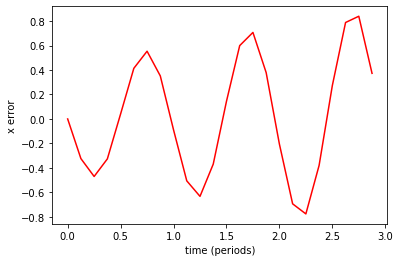

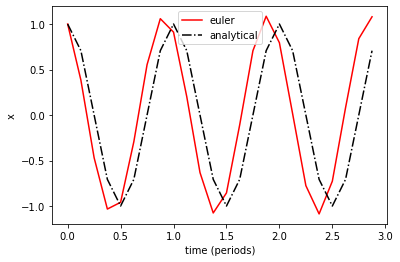

In [85]:
xErr2 = (xEuler - xAnalytical)
vErr2 = (vEuler - vAnalytical)

figure()
plot(tVisual/period, xErr2, 'r', label = 'position error')
xlabel('time (periods)')
ylabel('x error')

figure()
plot(tVisual/period, xEuler, 'r', label = 'euler')
plot(tVisual/period, xAnalytical, 'k-.', label = 'analytical')
xlabel('time (periods)')
ylabel('x')
legend()
show()

## Interpolation

Now we can interpolate between our points to get nicer curves. We use two methods:

 * basic interpolation (x = x0 + hv0)
 * euler-based interpolation

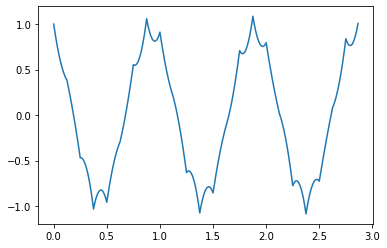

In [87]:
substeps = 5

xInterp = []
tInterp = []

for step in range(1, N):
    
    x_prev = xBezier[step-1]
    x_next = xBezier[step]
    control = bBezier[step-1]
    t = tVisual[step-1]
    
    temp = []
    tempT = []
    
    temp.append(x_prev)
    tempT.append(t)
    for i in range(1, N-1):
        t0 = i / float(N)
        temp.append((1.0 - t0)**2.0 * x_prev + t0*(1.0 - t0) * control + t0**2.0 * x_next)
        tempT.append(t + t0 * deltaT)
    
    xInterp += temp
    tInterp += tempT


plot(tInterp / period, xInterp)
show()